In [55]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
data = pd.read_csv('adult.csv', sep = ',')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [73]:
#Число ячеек со знаком ? 
print('Число ячеек со знаком ? столбец workclass', len(data[data['workclass']  == '?' ]))
print('Число ячеек со знаком ? столбец occupation', len(data[data['native-country']  == '?' ]))
print('Число ячеек со знаком ? столбец occupation', len(data[data['occupation']  == '?' ]))

Число ячеек со знаком ? столбец workclass 2799
Число ячеек со знаком ? столбец occupation 857
Число ячеек со знаком ? столбец occupation 2809


In [79]:
data = data[data['workclass'] != '?']
data = data[data['native-country'] != '?']
data = data[data['occupation'] != '?']

print('Число ячеек со знаком ? столбец workclass', len(data[data['workclass']  == '?' ]))
print('Число ячеек со знаком ? столбец occupation', len(data[data['native-country']  == '?' ]))
print('Число ячеек со знаком ? столбец occupation', len(data[data['occupation']  == '?' ]))

Число ячеек со знаком ? столбец workclass 0
Число ячеек со знаком ? столбец occupation 0
Число ячеек со знаком ? столбец occupation 0


In [5]:
from sklearn.linear_model import LogisticRegression

In [369]:
# Удаляем из анализа параметры workclass, marital-status,race,
Select_Data = data.drop(['workclass','educational-num','marital-status','race','income'], axis = 1) # Удаляем столбец income, т.к. это наше искомое значение


# Реализуем OneHotEncoding для параметров 
# education, occupation, relationship, gender, native-countr
X = pd.get_dummies(Select_Data, columns = [  'education',  'occupation', 'relationship',  
                                          'gender', 'native-country'])

In [370]:
# целевая переменная (столбец income) снова является категориальной
# переведем значения столбца в числа, оставив один столбец

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit( data['income'] )

LabelEncoder()

In [371]:
#Приводим данные к единой размерности
from sklearn.preprocessing import StandardScaler

In [372]:
ss = StandardScaler()

In [373]:
X = pd.DataFrame(ss.fit_transform(X))

X

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,-1.024983,0.350889,-0.146733,-0.21878,-0.078120,-0.166722,5.189610,-0.113685,-0.070238,-0.100142,...,-0.037053,-0.062328,-0.021035,-0.047312,-0.034896,-0.025332,-0.023985,0.308506,-0.042881,-0.022558
1,-0.041455,-0.945878,-0.146733,-0.21878,0.754701,-0.166722,-0.192693,-0.113685,-0.070238,-0.100142,...,-0.037053,-0.062328,-0.021035,-0.047312,-0.034896,-0.025332,-0.023985,0.308506,-0.042881,-0.022558
2,-0.798015,1.393592,-0.146733,-0.21878,-0.078120,-0.166722,-0.192693,-0.113685,-0.070238,-0.100142,...,-0.037053,-0.062328,-0.021035,-0.047312,-0.034896,-0.025332,-0.023985,0.308506,-0.042881,-0.022558
3,0.412481,-0.278420,0.877467,-0.21878,-0.078120,-0.166722,-0.192693,-0.113685,-0.070238,-0.100142,...,-0.037053,-0.062328,-0.021035,-0.047312,-0.034896,-0.025332,-0.023985,0.308506,-0.042881,-0.022558
4,-0.344079,0.084802,-0.146733,-0.21878,-0.910942,5.998024,-0.192693,-0.113685,-0.070238,-0.100142,...,-0.037053,-0.062328,-0.021035,-0.047312,-0.034896,-0.025332,-0.023985,0.308506,-0.042881,-0.022558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,-0.873671,0.639611,-0.146733,-0.21878,-0.244684,-0.166722,-0.192693,-0.113685,-0.070238,-0.100142,...,-0.037053,-0.062328,-0.021035,-0.047312,-0.034896,-0.025332,-0.023985,0.308506,-0.042881,-0.022558
45218,0.109857,-0.334735,-0.146733,-0.21878,-0.078120,-0.166722,-0.192693,-0.113685,-0.070238,-0.100142,...,-0.037053,-0.062328,-0.021035,-0.047312,-0.034896,-0.025332,-0.023985,0.308506,-0.042881,-0.022558
45219,1.471665,-0.358060,-0.146733,-0.21878,-0.078120,-0.166722,-0.192693,-0.113685,-0.070238,-0.100142,...,-0.037053,-0.062328,-0.021035,-0.047312,-0.034896,-0.025332,-0.023985,0.308506,-0.042881,-0.022558
45220,-1.251951,0.111279,-0.146733,-0.21878,-1.743763,-0.166722,-0.192693,-0.113685,-0.070238,-0.100142,...,-0.037053,-0.062328,-0.021035,-0.047312,-0.034896,-0.025332,-0.023985,0.308506,-0.042881,-0.022558


In [374]:
from sklearn.model_selection import train_test_split

In [375]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 12)

In [376]:
# В y записываем требуемые значения
y = pd.Series(data = le.transform(data['income']))

In [377]:
# Переменной присваем функцию
model = LogisticRegression()

In [378]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [379]:
model.score(X_train, y_train)

0.8468569406769666

In [380]:
model.score(X_test, y_test)

0.8508756412524323

In [381]:
import matplotlib.pyplot as plt
%matplotlib inline

In [382]:
y_predict = model.predict(X_test)
y_predict_name = le.inverse_transform(y_predict)
y_predict = pd.Series(y_predict)

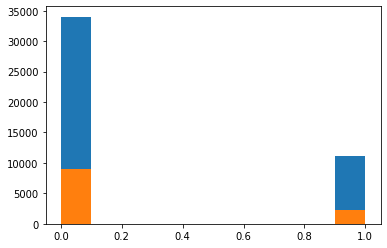

In [383]:
plt.hist(y)
plt.hist(y_predict)
plt.show()

In [385]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC


In [387]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [388]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [389]:
clf.score(X_train, y_train)

0.8534320084915674

In [390]:
clf.score(X_test, y_test)

0.8444188926233858